In [1]:
#16 X 7.5 (Our Tire)
#Slip-angle at max grip:
#What camber angle does the tire operate best at (Camber vs Lateral Force)?
#What Lateral Load to achieve max grip?
#18" X 6"
#Slip-angle at max grip:
#What camber angle does the tire operate best at (Camber vs. Lateral Force)?
#What Lateral Load to achieve max grip?
#Is it worth the extra 1lb per wheel?
#Possibly have ideal camber angle decided by the Monday
#18" X 7.5"
#Slip-angle at max grip:
#What camber angle does the tire operate best at (Camber vs. Lateral Force)?
#What Lateral Load to achieve max grip?
#Is it worth the added 2lb per wheel?

In [2]:
#Data Dictionary
#Camber = Inclination Angle
#Fy = Lateral Force
#Slip ratio = grip
#Slip angle = SA
#Weight
#slip angle vs lateral force vs normal force graphs

In [3]:
#Graphs I want to see:
#Fy vs slip angle 
#Fz vs slip angle
#Camber vs Fy
#Fx vs longitudinal force
#Aligning Torque vs slip angle
#Slip angle between 5 and 10 degrees

In [4]:
import pandas as pd
import numpy as np
import glob
import plotly.express as px
import matplotlib.pyplot as plt
from astropy.io import ascii
plt.rcParams['figure.figsize'] = [20, 12]
files_18x7 = glob.glob(r'C:\Users\scott\Downloads\RunData_10inch_Cornering_ASCII_SI\Hoosier_18x7.5\*.dat')
files_18x6 = glob.glob(r'C:\Users\scott\Downloads\RunData_10inch_Cornering_ASCII_SI\Hoosier_18x6\*.dat')
df_cornering_18x7 = pd.DataFrame()
df_cornering_18x6 = pd.DataFrame()

for f in files_18x7:
    csv = ascii.read(f, delimiter = '\t', guess=False, header_start = 1, data_start = 3).to_pandas()
    df_cornering_18x7 = pd.concat([df_cornering_18x7, csv])
for f in files_18x6:
    csv = ascii.read(f, delimiter = '\t', guess=False, header_start = 1, data_start = 3).to_pandas()
    df_cornering_18x6 = pd.concat([df_cornering_18x6, csv])

In [5]:
files_18x7 = glob.glob(r'C:\Users\scott\Downloads\RunData_10inch_DriveBrake_ASCII_SI\Hoosier_18x7.5\*.dat')
files_18x6 = glob.glob(r'C:\Users\scott\Downloads\RunData_10inch_DriveBrake_ASCII_SI\Hoosier_18x6\*.dat')

df_drivebrake_18x7 = pd.DataFrame()
df_drivebrake_18x6 = pd.DataFrame()

for f in files_18x7:
    csv = ascii.read(f, delimiter = '\t', guess=False, header_start = 1, data_start = 3).to_pandas()
    df_drivebrake_18x7 = pd.concat([df_drivebrake_18x7, csv])
for f in files_18x6:
    csv = ascii.read(f, delimiter = '\t', guess=False, header_start = 1, data_start = 3).to_pandas()
    df_drivebrake_18x6 = pd.concat([df_drivebrake_18x6, csv])

In [6]:
files_16x7 = glob.glob(r'C:\Users\scott\Downloads\RunData_Cornering_ASCII_SI_10inch_Round8\Hoosier_16x7.5\*.dat')
files_16x6 = glob.glob(r'C:\Users\scott\Downloads\RunData_Cornering_ASCII_SI_10inch_Round8\Hoosier_16x6\*.dat')

df_cornering_16x7 = pd.DataFrame()
df_cornering_16x6 = pd.DataFrame()

for f in files_16x7:
    csv = ascii.read(f, delimiter = '\t', guess=False, header_start = 1, data_start = 3).to_pandas()
    df_cornering_16x7 = pd.concat([df_cornering_16x7, csv])
for f in files_16x6:
    csv = ascii.read(f, delimiter = '\t', guess=False, header_start = 1, data_start = 3).to_pandas()
    df_cornering_16x6 = pd.concat([df_cornering_16x6, csv])

In [7]:
df_cornering_18x7['Test_Type'] = 'Cornering'
df_cornering_18x7['Wheel_Size'] = '18x7.5'
df_cornering_18x6['Test_Type'] = 'Cornering'
df_cornering_18x6['Wheel_Size'] = '18x6'
df_drivebrake_18x7['Test_Type'] = 'Drive Brake'
df_drivebrake_18x7['Wheel_Size'] = '18x7.5'
df_drivebrake_18x7['Test_Type'] = 'Drive Brake'
df_drivebrake_18x6['Wheel_Size'] = '18x6'
df_cornering_16x7['Test_Type'] = 'Cornering'
df_cornering_16x7['Wheel_Size'] = '16x7.5'
df_cornering_16x6['Test_Type'] = 'Cornering'
df_cornering_16x6['Wheel_Size'] = '16x6'

In [8]:
df = pd.concat([df_cornering_18x7, df_cornering_18x6, df_drivebrake_18x7, df_drivebrake_18x6, df_cornering_16x7, df_cornering_16x6])

In [9]:
df.sort_values(by=['Test_Type', 'Wheel_Size'], inplace=True)
df = df.reset_index(drop=True)

In [10]:
display(df.shape, df.head(10))

(838421, 25)

,ET,V,N,SA,IA,RL,RE,P,FX,FY,...,RST,TSTI,TSTC,TSTO,AMBTMP,SR,Test_Type,Wheel_Size,SL,AmbTmp
0,0.15,0.06,-0.01,-0.003,-0.007,19.46,-1105.06,83.32,4.03,-66.17,...,30.77,27.88,28.85,28.69,NaN,-1.0176,Cornering,16x6,NaN,27.70
1,0.16,0.04,0.05,0.010,-0.004,19.46,186.01,82.86,2.52,-64.81,...,30.75,27.86,28.87,28.66,NaN,-0.8954,Cornering,16x6,NaN,27.71
2,0.17,0.06,-0.08,-0.001,-0.012,19.47,-184.18,82.31,3.50,-66.79,...,30.72,27.86,28.85,28.62,NaN,-1.1057,Cornering,16x6,NaN,27.72
3,0.18,0.04,0.12,0.010,-0.007,19.47,82.67,82.41,3.22,-65.46,...,30.70,27.86,28.82,28.62,NaN,-0.7645,Cornering,16x6,NaN,27.71
4,0.19,0.06,0.19,0.024,-0.003,19.46,78.93,82.76,4.18,-66.93,...,30.69,27.88,28.79,28.63,NaN,-0.7535,Cornering,16x6,NaN,27.70
5,0.20,0.05,0.19,0.013,-0.012,19.46,66.04,83.32,4.45,-66.11,...,30.70,27.89,28.82,28.64,NaN,-0.7053,Cornering,16x6,NaN,27.72
6,0.21,0.06,-0.01,0.016,-0.012,19.46,-1105.06,83.27,4.72,-66.80,...,30.71,27.85,28.82,28.63,NaN,-1.0176,Cornering,16x6,NaN,27.72
7,0.22,0.04,0.12,-0.005,-0.018,19.47,82.67,82.97,4.29,-66.03,...,30.75,27.86,28.87,28.66,NaN,-0.7645,Cornering,16x6,NaN,27.70
8,0.23,0.07,-0.08,-0.006,-0.016,19.47,-214.26,82.46,5.15,-67.43,...,30.78,27.86,28.85,28.66,NaN,-1.0909,Cornering,16x6,NaN,27.70
9,0.24,0.05,-0.08,-0.015,-0.012,19.47,-154.09,82.46,3.75,-65.41,...,30.82,27.85,28.88,28.67,NaN,-1.1263,Cornering,16x6,NaN,27.72


In [11]:
#display(df.IA.value_counts().to_dict(), px.histogram(x=df.IA, color=df.Wheel_Size, barmode='group'))

In [12]:
df['IA'] = np.where((-5.5 <= df.IA) & (df.IA < -4.5), -5.0, df.IA)
df['IA'] = np.where((-4.5 <= df.IA) & (df.IA < -3.5), -4.0, df.IA)
df['IA'] = np.where((-3.5 <= df.IA) & (df.IA < -2.5), -3.0, df.IA)
df['IA'] = np.where((-2.5 <= df.IA) & (df.IA < -1.5), -2.0, df.IA)
df['IA'] = np.where((-1.5 <= df.IA) & (df.IA < -0.5), -1.0, df.IA)
df['IA'] = np.where((-0.5 <= df.IA) & (df.IA < 0.5), 0.0, df.IA)
df['IA'] = np.where((0.5 <= df.IA) & (df.IA < 1.5), 1.0, df.IA)
df['IA'] = np.where((1.5 <= df.IA) & (df.IA < 2.5), 2.0, df.IA)
df['IA'] = np.where((2.5 <= df.IA) & (df.IA < 3.5), 3.0, df.IA)
df['IA'] = np.where((3.5 <= df.IA) & (df.IA < 4.5), 4.0, df.IA)
df['IA'] = np.where((4.5 <= df.IA) & (df.IA < 5.5), 5.0, df.IA)

In [13]:
#display(df.FZ.value_counts().to_dict(), px.histogram(x=df.FZ, color=df.Wheel_Size, barmode='group'))

In [14]:
df['FZ'] = np.where((16 >= df.FZ) & (-300 < df.FZ), 222.0, df.FZ)
df['FZ'] = np.where((-300 >= df.FZ) & (-500 < df.FZ), 445.0, df.FZ)
df['FZ'] = np.where((-500 >= df.FZ) & (-700 < df.FZ), 667.0, df.FZ)
df['FZ'] = np.where((-700 >= df.FZ) & (-1000 < df.FZ), 890.0, df.FZ)
df['FZ'] = np.where((-1000 >= df.FZ) & (-1624 < df.FZ), 1113.0, df.FZ)

In [15]:
#df.FZ.value_counts().to_dict()

In [16]:
#display(df.P.value_counts(), px.histogram(x=df.P, color=df.Wheel_Size, barmode='group'))

In [17]:
df['P'] = np.where((0 <= df.P) & (df.P < 65), 8, df.P)
df['P'] = np.where((65 <= df.P) & (df.P < 75), 10, df.P)
df['P'] = np.where((75 <= df.P) & (df.P < 90), 12, df.P)
df['P'] = np.where((90 <= df.P) & (df.P < 100), 14, df.P)

In [18]:
#display(df.SA.value_counts(), px.histogram(x=df.SA, color=df.Wheel_Size, barmode='group'))

In [19]:
#df['SA'] = np.where((df.SA > -13) & (df.SA < -5), -6.05, df.SA)
#df['SA'] = np.where((df.SA > -5) & (df.SA < -1.5), -3.05, df.SA)
#df['SA'] = np.where((df.SA > -1.5) & (df.SA < -0.5), -1.05, df.SA)
#df['SA'] = np.where((df.SA > -0.5) & (df.SA < 0.5), 0.05, df.SA)
#df['SA'] = np.where((df.SA > 0.5) & (df.SA < 4), 0.85, df.SA)
#df['SA'] = np.where((df.SA > 3) & (df.SA < 13), 5.95, df.SA)

In [20]:
def plot_SAvFY_func(Wheel_Size, IA, P, Test_Type, FZ):
    if type(FZ) == list:
        plot_df = df[(df.Wheel_Size == Wheel_Size) & (df.IA == IA) & (df.P == P) & (df.Test_Type == Test_Type) & (df.FZ.isin(FZ))]
        x = []
        y = []
        for i in range(len(FZ)):
            y.append(plot_df[plot_df.FZ == FZ[i]].FY) 
            x.append(plot_df[plot_df.FZ == FZ[i]].SA)
        plt.xlabel('Slip Angle')
        plt.ylabel('Lateral Force')
        plt.title('Slip Angle vs Lateral Force')
        for i in range(len(FZ)):
            plt.scatter(x[i], y[i], label=FZ[i])
        plt.legend()
        return plt.show()
    else:
        plot_df = df[(df.Wheel_Size == Wheel_Size) & (df.IA == IA) & (df.P == P) & (df.Test_Type == Test_Type) & (df.FZ == FZ)]
        y = plot_df.FY
        x = plot_df.SA
        plt.xlabel('Slip Angle')
        plt.ylabel('Lateral Force')
        plt.title('Slip Angle vs Lateral Force')
        plt.scatter(x,y)
        return plt.show()

In [21]:
def plot_SRvFY_func(Wheel_Size, IA, P, Test_Type, FZ):
    if type(FZ) == list:
        plot_df = df[(df.Wheel_Size == Wheel_Size) & (df.IA == IA) & (df.P == P) & (df.Test_Type == Test_Type) & (df.FZ.isin(FZ))]
        x = []
        y = []
        for i in range(len(FZ)):
            y.append(plot_df[plot_df.FZ == FZ[i]].FY) 
            x.append(plot_df[plot_df.FZ == FZ[i]].SR)
        plt.xlabel('Slip Ratio')
        plt.ylabel('Lateral Force')
        plt.title('Slip Ratio vs Lateral Force')
        for i in range(len(FZ)):
            plt.scatter(x[i], y[i], label=FZ[i])
        plt.legend()
        return plt.show()
    else:
        plot_df = df[(df.Wheel_Size == Wheel_Size) & (df.IA == IA) & (df.P == P) & (df.Test_Type == Test_Type) & (df.FZ == FZ)]
        y = plot_df.FY
        x = plot_df.SR
        plt.xlabel('Slip Ratio')
        plt.ylabel('Lateral Force')
        plt.title('Slip Ratio vs Lateral Force')
        plt.scatter(x,y)
        return plt.show()

In [22]:
def plot_SAvFZ_func(Wheel_Size, IA, P, Test_Type, FZ):
    if type(FZ) == list:
        plot_df = df[(df.Wheel_Size == Wheel_Size) & (df.IA == IA) & (df.P == P) & (df.Test_Type == Test_Type) & (df.FZ.isin(FZ))]
        x = []
        y = []
        for i in range(len(FZ)):
            y.append(plot_df[plot_df.FZ == FZ[i]].FZ) 
            x.append(plot_df[plot_df.FZ == FZ[i]].SA)
        plt.xlabel('Slip Angle')
        plt.ylabel('Normal Load')
        plt.title('Slip Angle vs Normal Load')
        for i in range(len(FZ)):
            plt.scatter(x[i], y[i], label=FZ[i])
        plt.legend()
        return plt.show()
    else:
        plot_df = df[(df.Wheel_Size == Wheel_Size) & (df.IA == IA) & (df.P == P) & (df.Test_Type == Test_Type) & (df.FZ == FZ)]
        y = plot_df.FZ
        x = plot_df.SA
        plt.xlabel('Slip Angle')
        plt.ylabel('Normal Load')
        plt.title('Slip Angle vs Normal Load')
        plt.scatter(x,y)
        return plt.show()

In [23]:
def plot_IAvFY_func(Wheel_Size, IA, P, Test_Type, FZ):
    if type(FZ) == list:
        plot_df = df[(df.Wheel_Size == Wheel_Size) & (df.IA == IA) & (df.P == P) & (df.Test_Type == Test_Type) & (df.FZ.isin(FZ))]
        x = []
        y = []
        for i in range(len(FZ)):
            y.append(plot_df[plot_df.FZ == FZ[i]].FY) 
            x.append(plot_df[plot_df.FZ == FZ[i]].IA)
        plt.xlabel('Inclination Angle')
        plt.ylabel('Lateral Force')
        plt.title('Inclination Angle vs Lateral Force')
        for i in range(len(FZ)):
            plt.scatter(x[i], y[i], label=FZ[i])
        plt.legend()
        return plt.show()
    else:
        plot_df = df[(df.Wheel_Size == Wheel_Size) & (df.IA == IA) & (df.P == P) & (df.Test_Type == Test_Type) & (df.FZ == FZ)]
        y = plot_df.FY
        x = plot_df.IA
        plt.xlabel('Inclination Angle')
        plt.ylabel('Lateral Force')
        plt.title('Inclination Angle vs Lateral Force')
        plt.scatter(x,y)
        return plt.show()

In [24]:
def plot_SAvFX_func(Wheel_Size, IA, P, Test_Type, FZ):
    if type(FZ) == list:
        plot_df = df[(df.Wheel_Size == Wheel_Size) & (df.IA == IA) & (df.P == P) & (df.Test_Type == Test_Type) & (df.FZ.isin(FZ))]
        x = []
        y = []
        for i in range(len(FZ)):
            y.append(plot_df[plot_df.FZ == FZ[i]].FX) 
            x.append(plot_df[plot_df.FZ == FZ[i]].SA)
        plt.xlabel('Slip Angle')
        plt.ylabel('Longitudinal Force')
        plt.title('Slip Angle vs Longitudinal Force')
        for i in range(len(FZ)):
            plt.scatter(x[i], y[i], label=FZ[i])
        plt.legend()
        return plt.show()
    else:
        plot_df = df[(df.Wheel_Size == Wheel_Size) & (df.IA == IA) & (df.P == P) & (df.Test_Type == Test_Type) & (df.FZ == FZ)]
        y = plot_df.FX
        x = plot_df.SA
        plt.xlabel('Slip Angle')
        plt.ylabel('Longitudinal Force')
        plt.title('Slip Angle vs Longitudinal Force')
        plt.scatter(x,y)
        return plt.show()

In [25]:
def plot_SAvMZ_func(Wheel_Size, IA, P, Test_Type, FZ):
    if type(FZ) == list:
        plot_df = df[(df.Wheel_Size == Wheel_Size) & (df.IA == IA) & (df.P == P) & (df.Test_Type == Test_Type) & (df.FZ.isin(FZ))]
        x = []
        y = []
        for i in range(len(FZ)):
            y.append(plot_df[plot_df.FZ == FZ[i]].MZ) 
            x.append(plot_df[plot_df.FZ == FZ[i]].SA)
        plt.xlabel('Slip Angle')
        plt.ylabel('Aligning Torque')
        plt.title('Slip Angle vs Aligning Torque')
        for i in range(len(FZ)):
            plt.scatter(x[i], y[i], label=FZ[i])
        plt.legend()
        return plt.show()
    else:
        plot_df = df[(df.Wheel_Size == Wheel_Size) & (df.IA == IA) & (df.P == P) & (df.Test_Type == Test_Type) & (df.FZ == FZ)]
        y = plot_df.MZ
        x = plot_df.SA
        plt.xlabel('Slip Angle')
        plt.ylabel('Aligning Torque')
        plt.title('Slip Angle vs Aligning Torque')
        plt.scatter(x,y)
        return plt.show()

In [26]:
#Parameters
Wheel_Size_list = df.Wheel_Size.unique().tolist()
IA_list = df.IA.unique().tolist()
P_list = df.P.unique().tolist()
Test_Type_list = df.Test_Type.unique().tolist()
FZ_list = df.FZ.unique().tolist()

def parameter_func(Wheel_Size, IA, P, Test_Type, FZ):
    return str(""""Your chosen parameters are: 
               Wheel: """ + Wheel_Size + 
              """ IA: """ + str(IA) + 
              """ P: """ + str(P) + 
              """ Test_Type: """ + Test_Type + 
              """ FZ: """ + str(FZ))

Enter which graph you would like to see:plot_SAvFY_func
Enter Wheel Size:16x7.5
Enter IA:0
Enter P:10
Enter Test Type:Cornering
How many normal loads would you like to graph?5
Enter FZ:222
Enter FZ:445
Enter FZ:667
Enter FZ:890
Enter FZ:1113
"Your chosen parameters are: 
               Wheel: 16x7.5 IA: 0.0 P: 10.0 Test_Type: Cornering FZ: [222.0, 445.0, 667.0, 890.0, 1113.0]


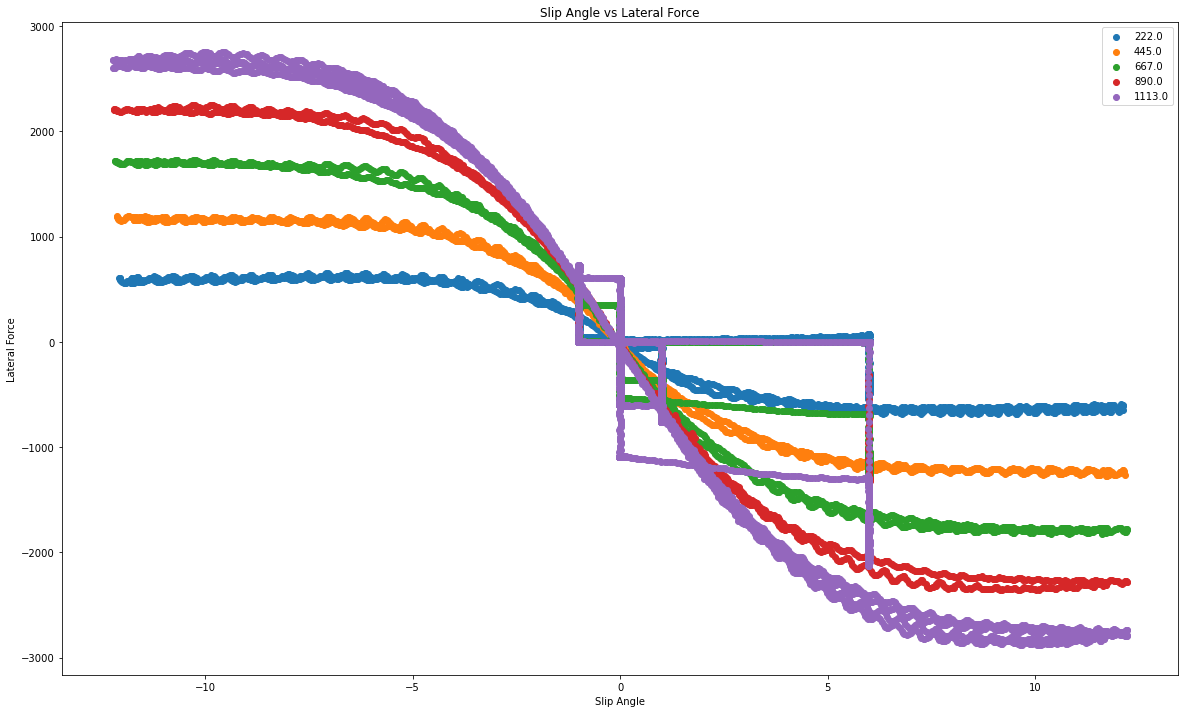

Repeat?Y
Enter which graph you would like to see:plot_SAvFY_func
Enter Wheel Size:16x7.5
Enter IA:2
Enter P:10
Enter Test Type:Cornering
How many normal loads would you like to graph?5
Enter FZ:222
Enter FZ:445
Enter FZ:667
Enter FZ:890
Enter FZ:1113
"Your chosen parameters are: 
               Wheel: 16x7.5 IA: 2.0 P: 10.0 Test_Type: Cornering FZ: [222.0, 445.0, 667.0, 890.0, 1113.0]


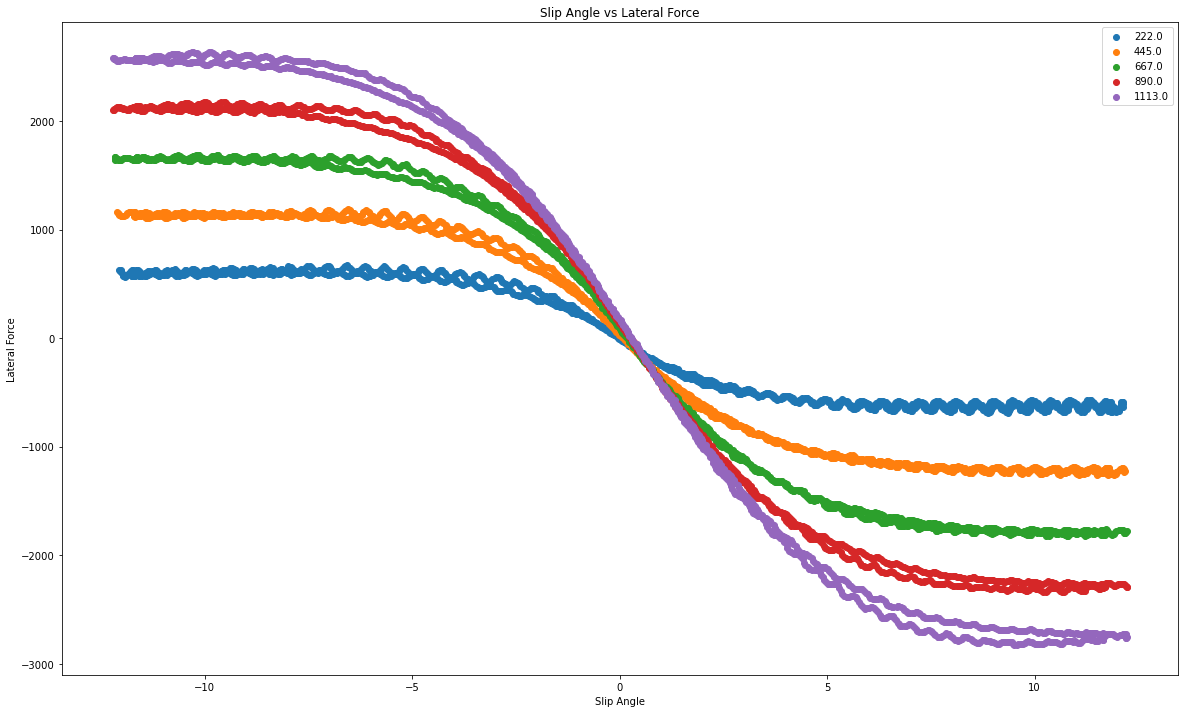

Repeat?Y
Enter which graph you would like to see:plot_SAvFY_func
Enter Wheel Size:16x7.5
Enter IA:4
Enter P:10
Enter Test Type:Cornering
How many normal loads would you like to graph?5
Enter FZ:222
Enter FZ:445
Enter FZ:667
Enter FZ:890
Enter FZ:1113
"Your chosen parameters are: 
               Wheel: 16x7.5 IA: 4.0 P: 10.0 Test_Type: Cornering FZ: [222.0, 445.0, 667.0, 890.0, 1113.0]


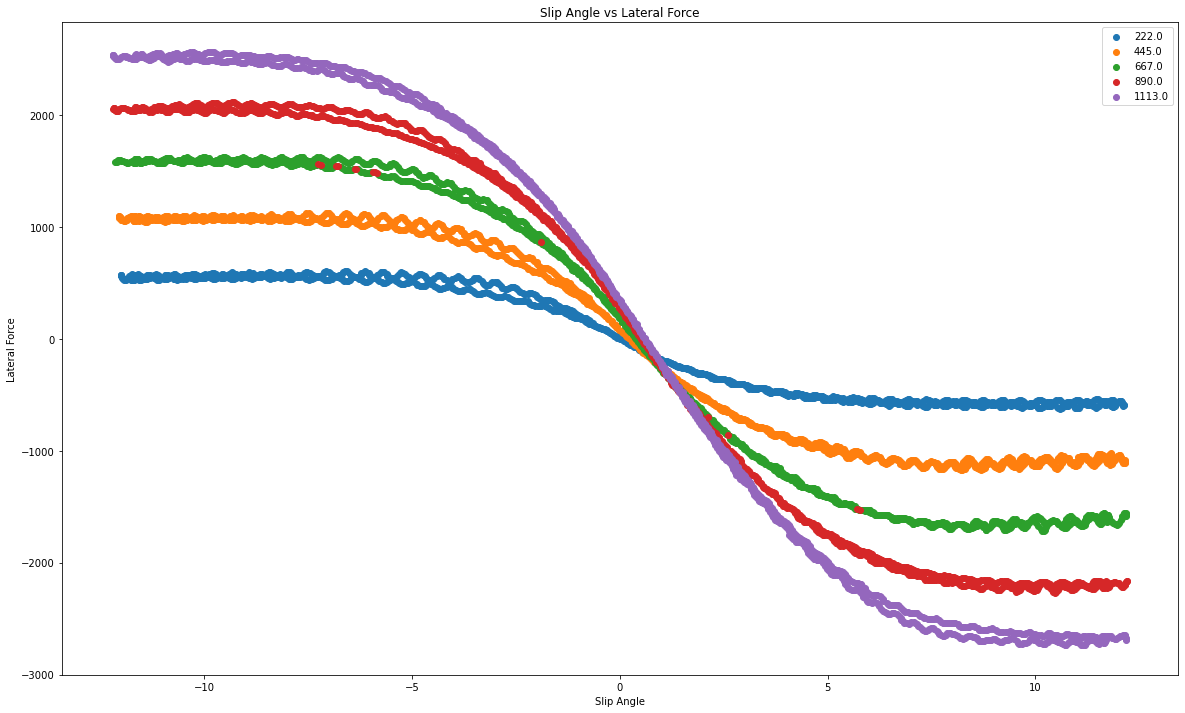

Repeat?N


In [27]:
loop = True
while loop == True:
    FZ_Input = []
    Graph_Input = input("Enter which graph you would like to see:")
    Wheel_Size_Input = str(input("Enter Wheel Size:"))
    IA_Input = float(input("Enter IA:"))
    P_Input = float(input("Enter P:"))
    Test_Type_Input = str(input("Enter Test Type:"))
    FZ_Count_Input = str(input("How many normal loads would you like to graph?"))
    for i in range(int(FZ_Count_Input)):
        FZ_Input.append(float(input("Enter FZ:")))
    print(parameter_func(Wheel_Size_Input, IA_Input, P_Input, Test_Type_Input, FZ_Input))
    func = globals()[Graph_Input]
    func(Wheel_Size_Input, IA_Input, P_Input, Test_Type_Input, FZ_Input)
    Loop_Input = str(input("Repeat?"))
    if Loop_Input == 'Y':
        loop = True
    if Loop_Input == 'N':
        loop = False